# MFG Absenteeism Analysis
dataset info:

Title: Absenteeism Dataset

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset

Date Accessed: October 2, 2023

In [14]:
# Importing python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree


In [15]:
# Preparing the dataset into a python data frame for processing and analysis
df = pd.read_csv('MFGEmployees4.csv')

In [16]:
# Exploratory data analysis
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   EmployeeNumber    Surname GivenName Gender             City JobTitle  \
0               1  Gutierrez     Molly      F          Burnaby    Baker   
1               2   Hardwick   Stephen      M        Courtenay    Baker   
2               3    Delgado   Chester      M         Richmond    Baker   
3               4      Simon     Irene      F         Victoria    Baker   
4               5   Delvalle    Edward      M  New Westminster    Baker   

  DepartmentName    StoreLocation Division        Age  LengthService  \
0         Bakery          Burnaby   Stores  32.028816       6.018478   
1         Bakery          Nanaimo   Stores  40.320902       5.532445   
2         Bakery         Richmond   Stores  48.822047       4.389973   
3         Bakery         Victoria   Stores  44.599357       3.081736   
4         Bakery  New Westminster   Stores  35.697876       3.619091   

   AbsentHours BusinessUnit  
0    36.577306       Stores  
1    30.165072       Stores  
2    83.807798       Store

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


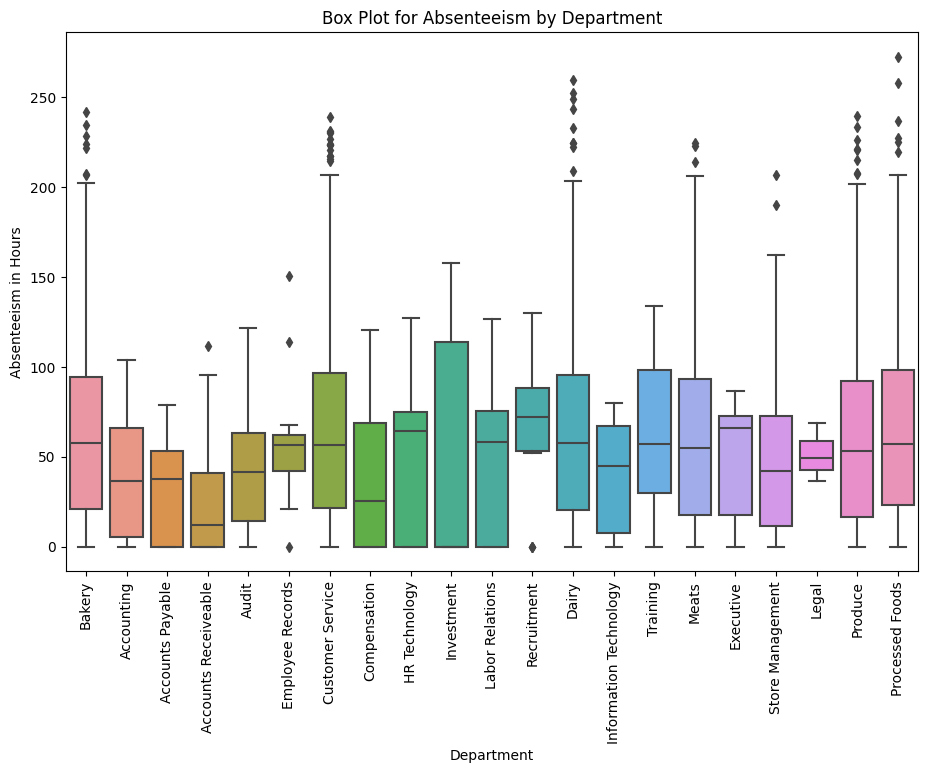

In [17]:
# visualizing the monthly income by department using a box plot
plt.figure(figsize=(11, 7))
sns.boxplot(x='DepartmentName', y='AbsentHours', data=df)

# adding graph information
plt.xlabel('Department')
plt.ylabel('Absenteeism in Hours')
plt.title('Box Plot for Absenteeism by Department')
plt.xticks(rotation=90)
plt.show()

The number of employees in the Compensation department is: 9


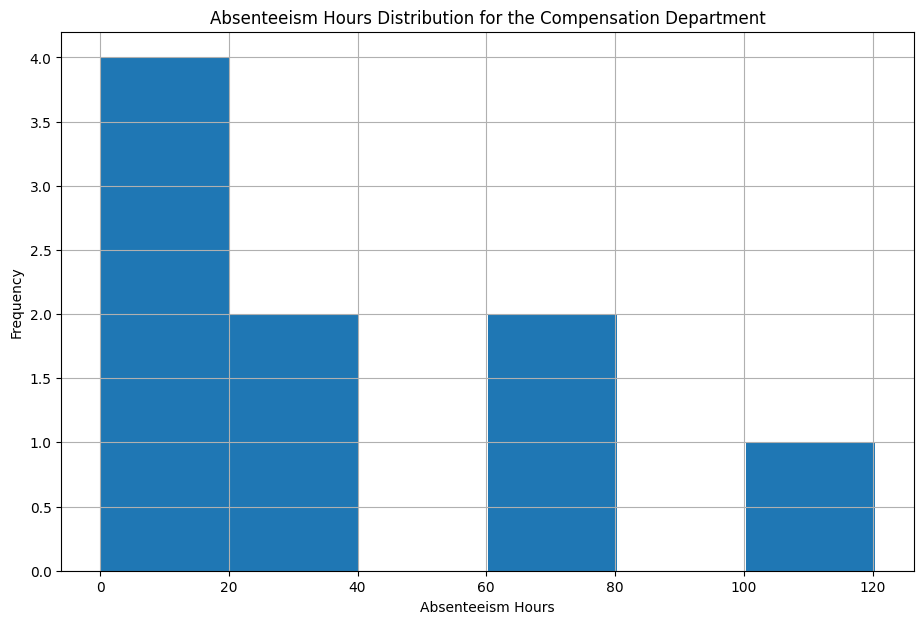

In [18]:
# Exploring the Compensation department
compensation_department = df[df['DepartmentName'] == 'Compensation']
print('The number of employees in the Compensation department is:', len(compensation_department))

compensation_department['AbsentHours'].hist(bins=6, figsize=(11, 7))
plt.title('Absenteeism Hours Distribution for the Compensation Department')
plt.xlabel('Absenteeism Hours')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Running a decission tree regressor analyis to predict absenteeism

# Select relevant features for prediction (Age, LengthService, and potentially others)
features = ['Age', 'LengthService']

# Define the target variable
target = 'AbsentHours'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Print the decision tree rules
tree_rules = export_text(model, feature_names=features)
print("Decision Tree Rules:")
print(tree_rules)

# Plot the decision tree (requires 'graphviz' library)
# plt.figure(figsize=(12, 33))
# plot_tree(model, feature_names=features, filled=True, rounded=True, fontsize=10)
# plt.show()


Mean Squared Error (MSE): 1354.5796200654015
R-squared (R2): 0.40317589937624876
Decision Tree Rules:
|--- Age <= 42.93
|   |--- Age <= 35.44
|   |   |--- Age <= 30.78
|   |   |   |--- Age <= 27.26
|   |   |   |   |--- Age <= 24.40
|   |   |   |   |   |--- Age <= 22.90
|   |   |   |   |   |   |--- LengthService <= 6.55
|   |   |   |   |   |   |   |--- Age <= 22.36
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Age >  22.36
|   |   |   |   |   |   |   |   |--- Age <= 22.40
|   |   |   |   |   |   |   |   |   |--- value: [4.69]
|   |   |   |   |   |   |   |   |--- Age >  22.40
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- LengthService >  6.55
|   |   |   |   |   |   |   |--- LengthService <= 6.57
|   |   |   |   |   |   |   |   |--- value: [6.93]
|   |   |   |   |   |   |   |--- LengthService >  6.57
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- Age >  22.90
|   |   |   |   |   |   |